# Opening and plotting a few results from the MI dataset

———————————————————————————————— EXPERIMENTAL PARADIGM ————————————————————————————————

Subjects were instructed to perform a kinaesthetic motor imagery of the right hand and to find their own strategy to control and bring the ball to the target. 

The experimental protocol consisted of - 6 EEG-fMRI runs with a 20s block design alternating rest and task :
 1. motor localizer run (task-motorloc) - 8 blocks X (20s rest+20 s task)  
 2. motor imagery run without NF (task-MIpre) -5 blocks X (20s rest+20 s task) 
 3. three NF runs with different NF conditions (task-eegNF, task-fmriNF, task-eegfmriNF) occurring in random order - 10 blocks X (20s rest+20 s task) 
 4. motor imagery run without NF (task-MIpost) - 5 blocks X (20s rest+20 s task)

_______________________________________________________________________________________
EEG NF SCORES :

Neurofeedback scores can be found in the .mat structures in
XP1/derivatives/sub-xp1*/NF_eeg/d_sub*NFeeg_scores.mat

Structures names NF_eeg are composed of the following subfields:

NF_eeg :
1. filteegpow_left (Bandpower of the filtered eeg signal in C1) 
2. .filteegpow_right (Bandpower of the filtered eeg signal in C2)
3. .nf_laterality (NF score computed as for real-time calculation - equation (1)) 
4. .nf (vector of NF scores -4 per s- computed as in eq 3) for comparison with XP2 
5. .smoothed 
6. .eegdata (64 X 200 X 400 matrix, with the pre-processed EEG signals according to the steps described above) 
7. .method

C:\Users\annic\AppData\Local\Temp\ipykernel_36152\3725253065.py:32: RuntimeWarning: invalid value encountered in divide
  later_arr = (rh-lh)/(rh+lh)
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\3725253065.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


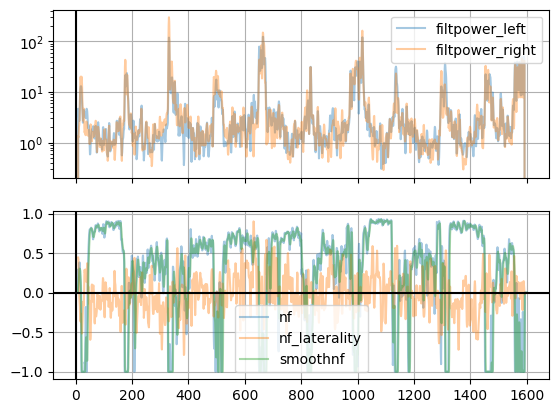

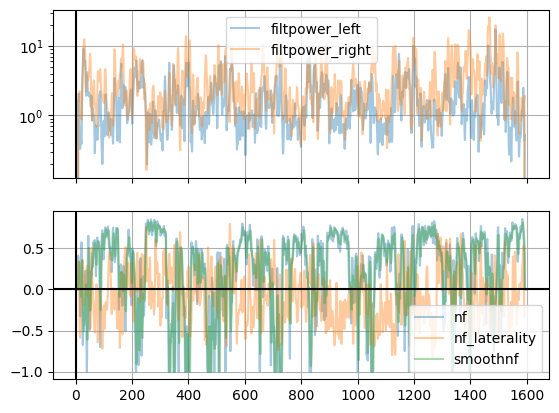

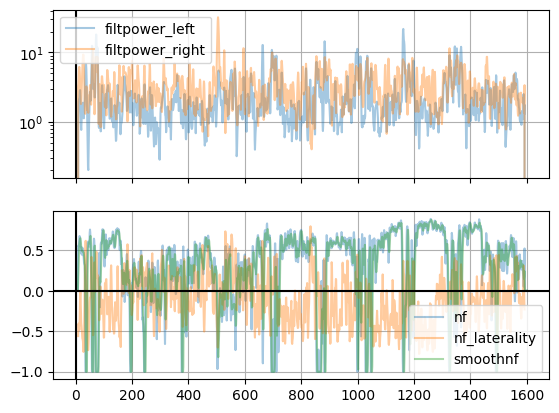

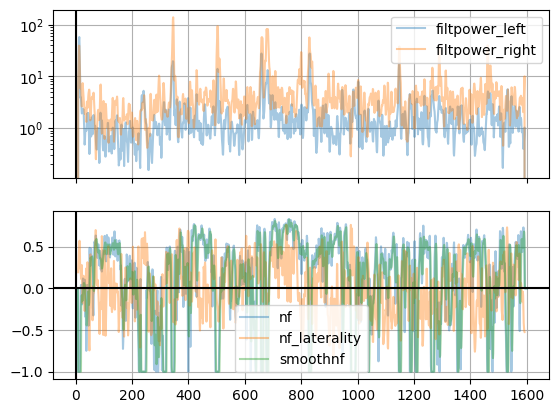

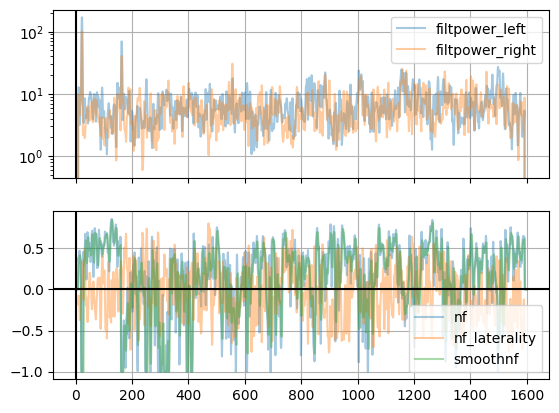

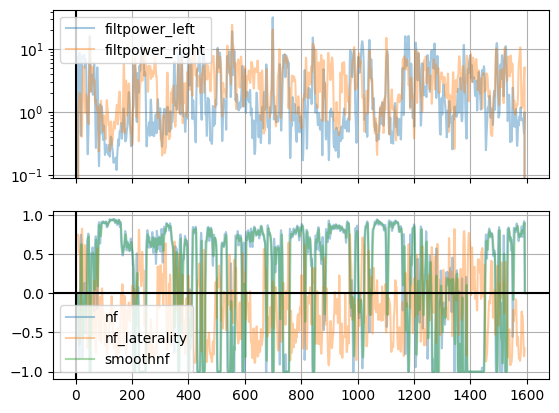

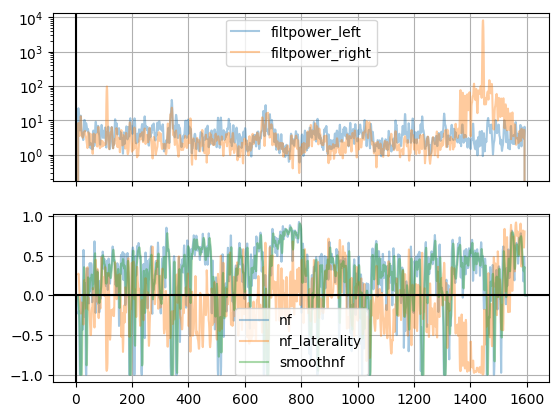

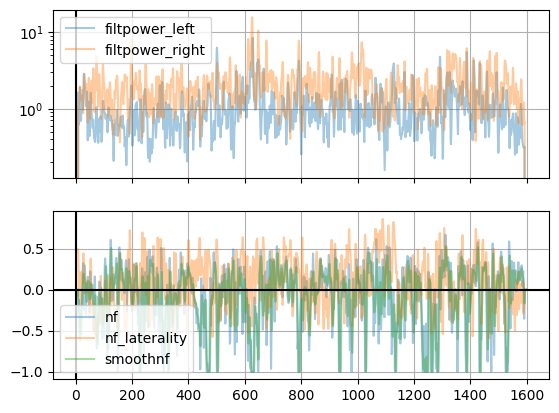

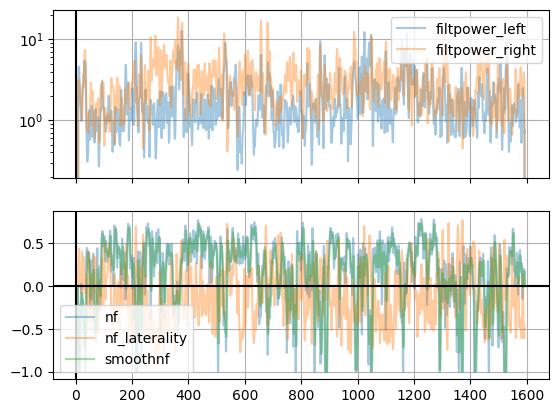

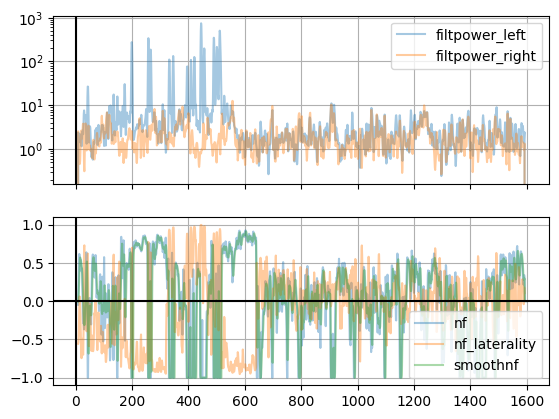

In [3]:
import sys,os
import scipy.io
import h5py
import mne

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



def return_mat_data(mat_path):
    mat_f = h5py.File(mat_path)
    
    preprocessed_eeg = mat_f["NF_eeg"]["eegdata"][:]
    fig,axes = plt.subplots(2,1,sharex=True)

    # Brain activity
    open_this = ["filtpower_left","filtpower_right"]
    xs = np.arange(1,1600+1,1)
    for saved_val in open_this:
        val = mat_f["NF_eeg"][saved_val][:]
        axes[0].plot(xs,val[:,0],label=saved_val,alpha=0.4)

    rh = np.log(mat_f["NF_eeg"]["filtpower_left"][:]+1.01)
    lh = np.log(mat_f["NF_eeg"]["filtpower_right"][:]+1.01)

    rh = mat_f["NF_eeg"]["filtpower_left"][:]
    lh = mat_f["NF_eeg"]["filtpower_right"][:]
    
    
    later_arr = (rh-lh)/(rh+lh)
    saved_later = mat_f["NF_eeg"]["nf_laterality"][:]
    diff = later_arr - saved_later

    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    # axes[1].plot(xs,later_arr,label="computed",alpha=1.0,color="red")    
    # # axes[1].plot(xs,saved_later,label="saved",alpha=0.4)
    # axes[1].plot(xs,diff,label="saved",alpha=0.4)


    # Feedback
    open_this = ["nf","nf_laterality","smoothnf"]
    for saved_val in open_this:
        val = np.clip(mat_f["NF_eeg"][saved_val][:],-1,1)
        axes[1].plot(xs,val[:,0],label=saved_val,alpha=0.4)
    axes[1].legend()
    axes[1].grid()

    for ax in axes:
        ax.axhline(y=0, color='k')
        ax.axvline(x=0, color='k')

    fig.show()
    # Opening method :
    # print( mat_f["NF_eeg"]["method"].keys())
    # print(mat_f["NF_eeg"]["method"]["freq_band_nf"][:])
    # print(mat_f["NF_eeg"]["method"]["freq_band_nf_laterality"][:])
    # print(mat_f["NF_eeg"]["method"]["lapC3_filter"][:].shape)

data_path = os.path.join("..","..","data","xp1")
derivs_path = os.path.join(data_path,"derivatives")
subj_names = os.listdir(derivs_path)
subject_paths = [os.path.join(derivs_path,subj_name) for subj_name in subj_names]

plot_data = True
if plot_data:
    for k,subj_name in enumerate(subj_names):
        dataname = "d_" + subj_name + "_task-eegNF_NFeeg_scores.mat"
        mat_path_test = os.path.join(subject_paths[k],"NF_eeg",dataname)
        return_mat_data(mat_path_test)

1.0075407072555778e+17
1.0075409060223909e+17
1.0075409080211336e+17


C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.0075409586679206e+17
1.0075410060400371e+17
1.00754100723053e+17


C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.007541055755186e+17
1.0075410571529315e+17


C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


1.0075452055311701e+17
1.0075452072628286e+17


C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_36152\253040398.py:132: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


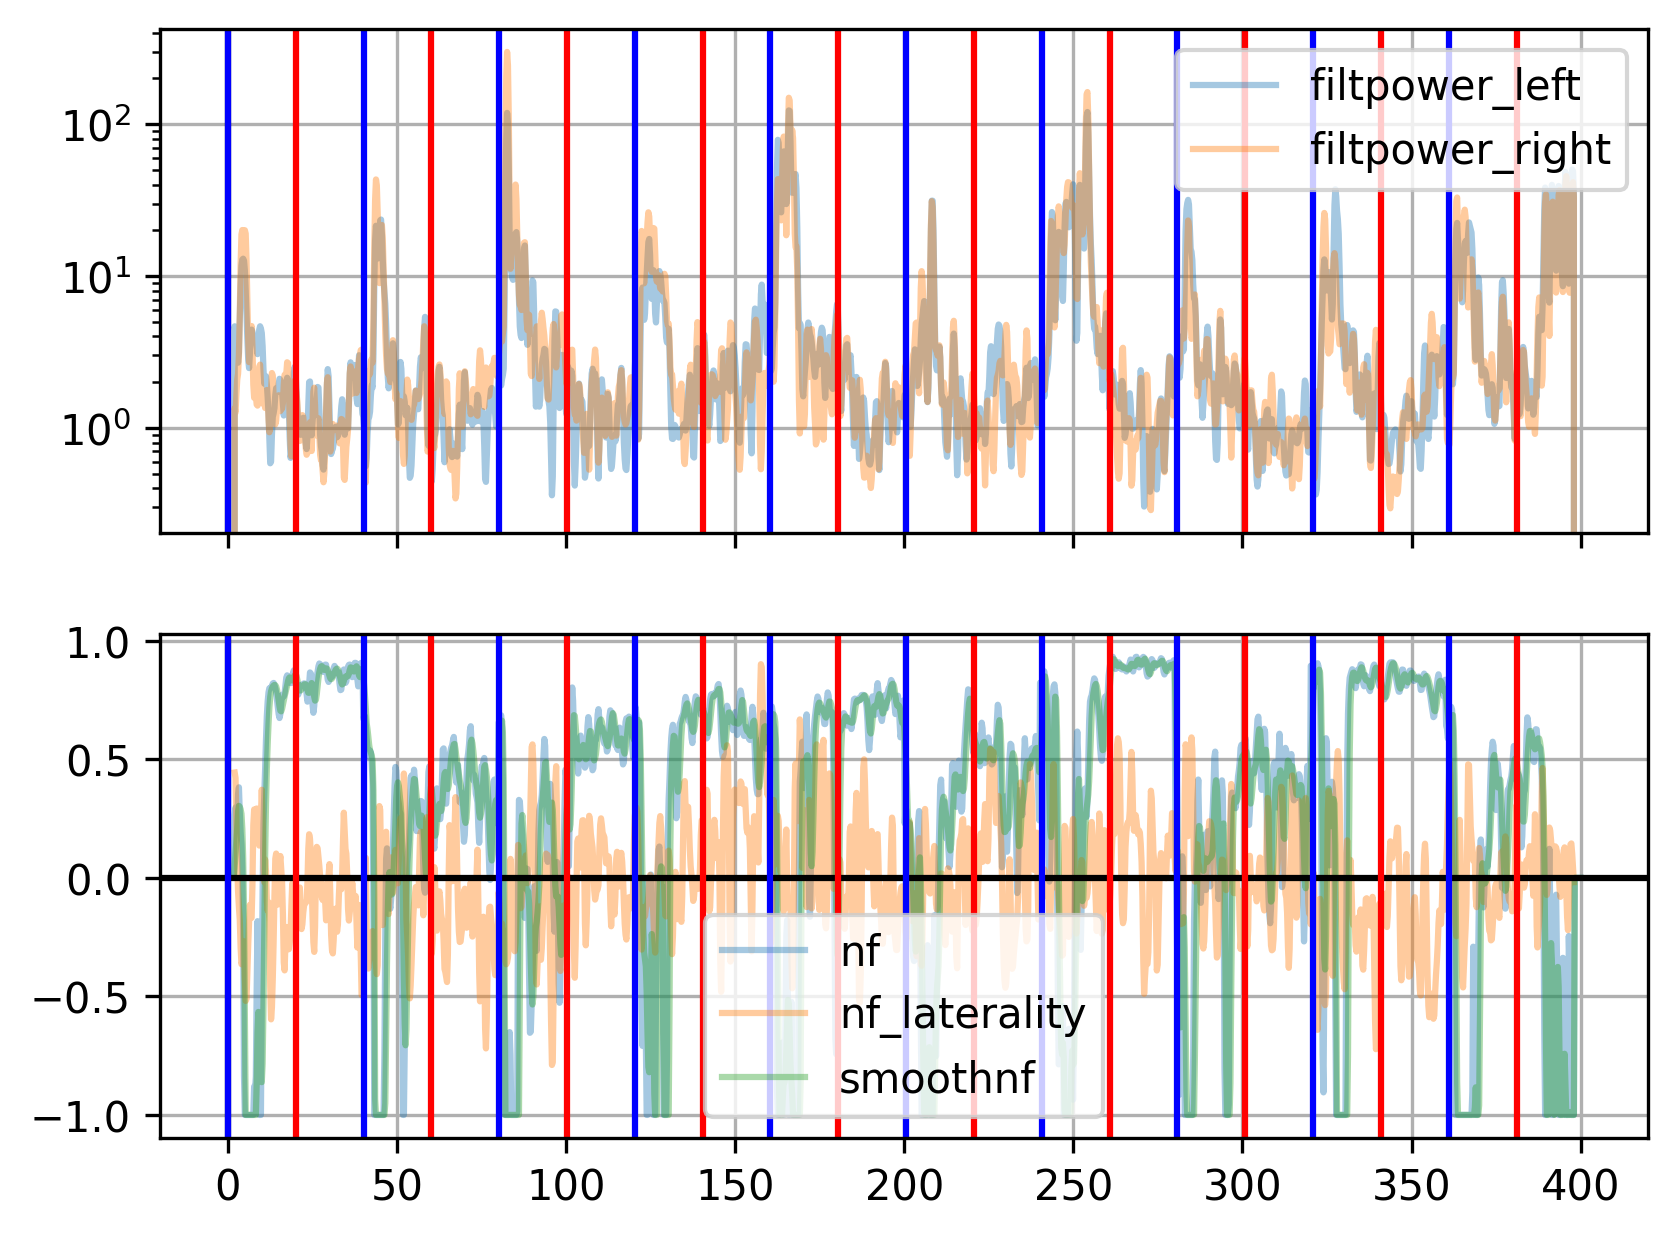

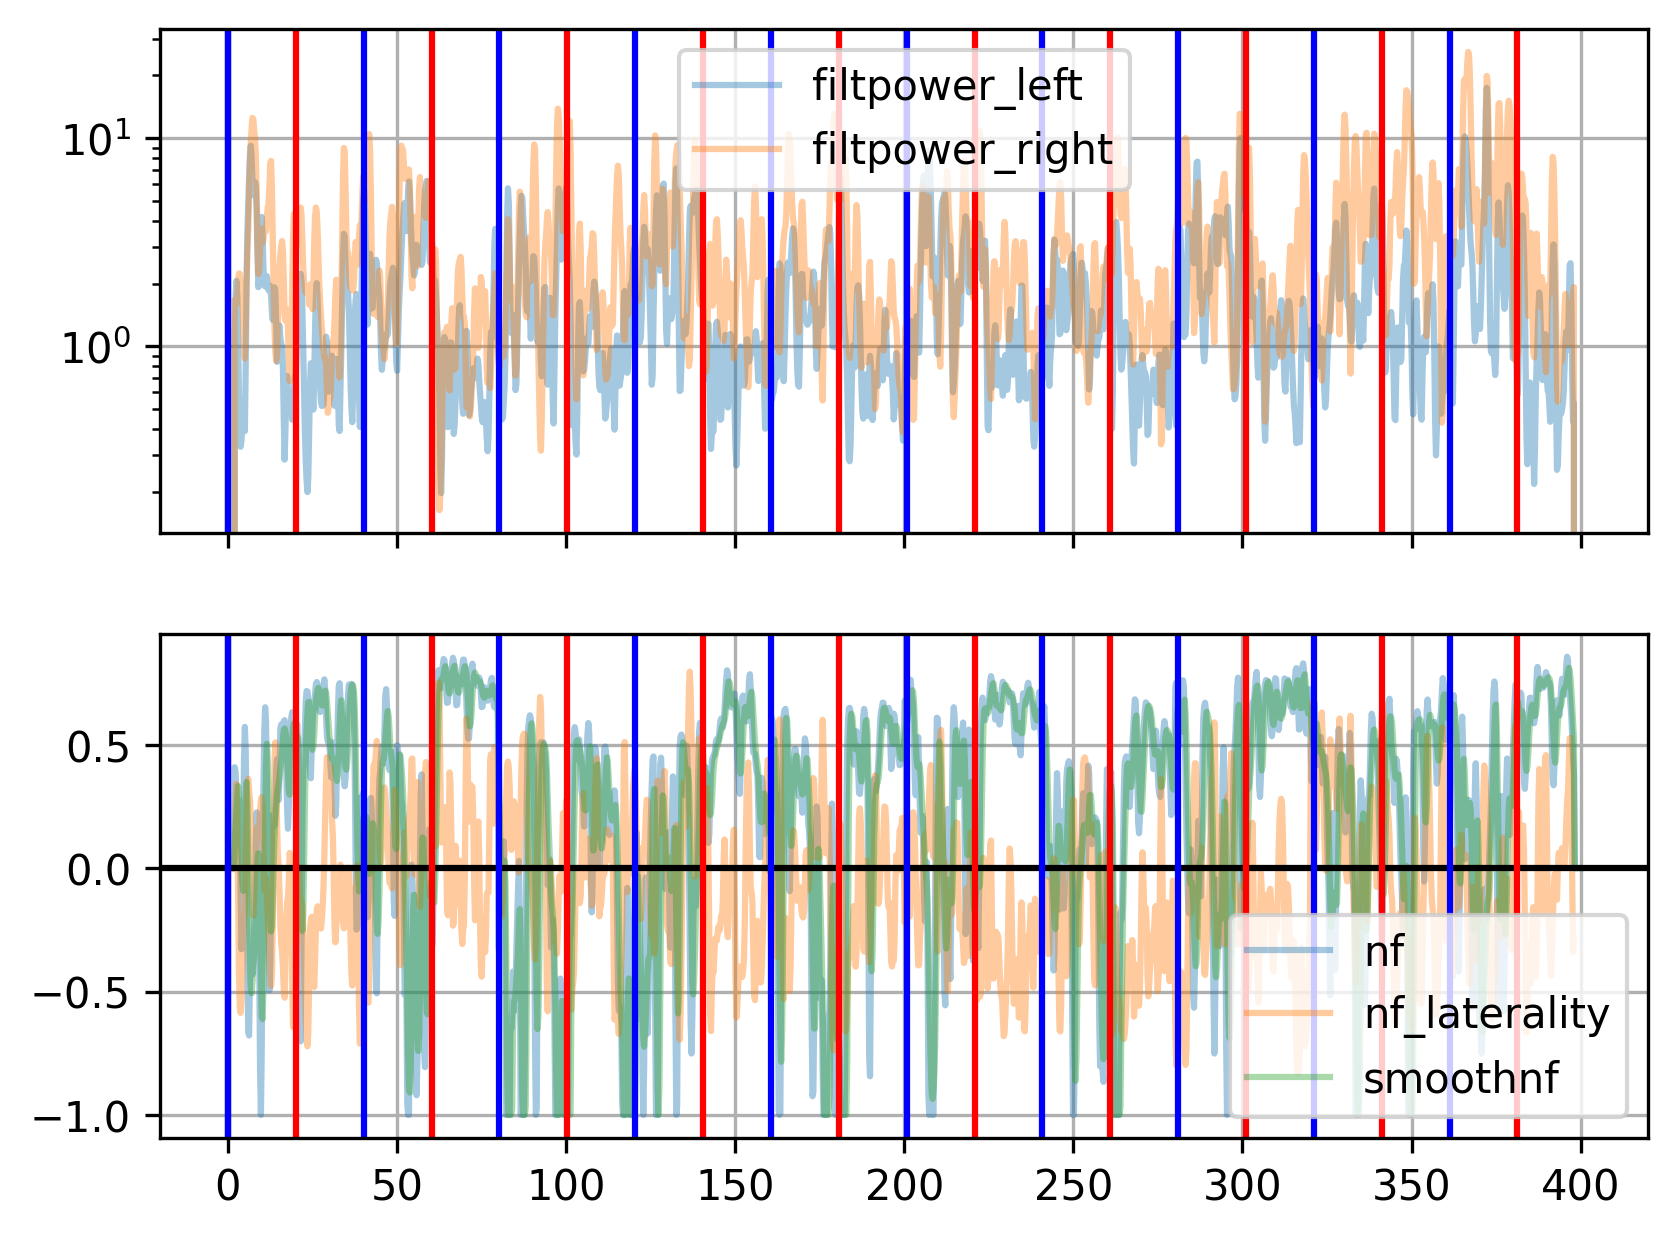

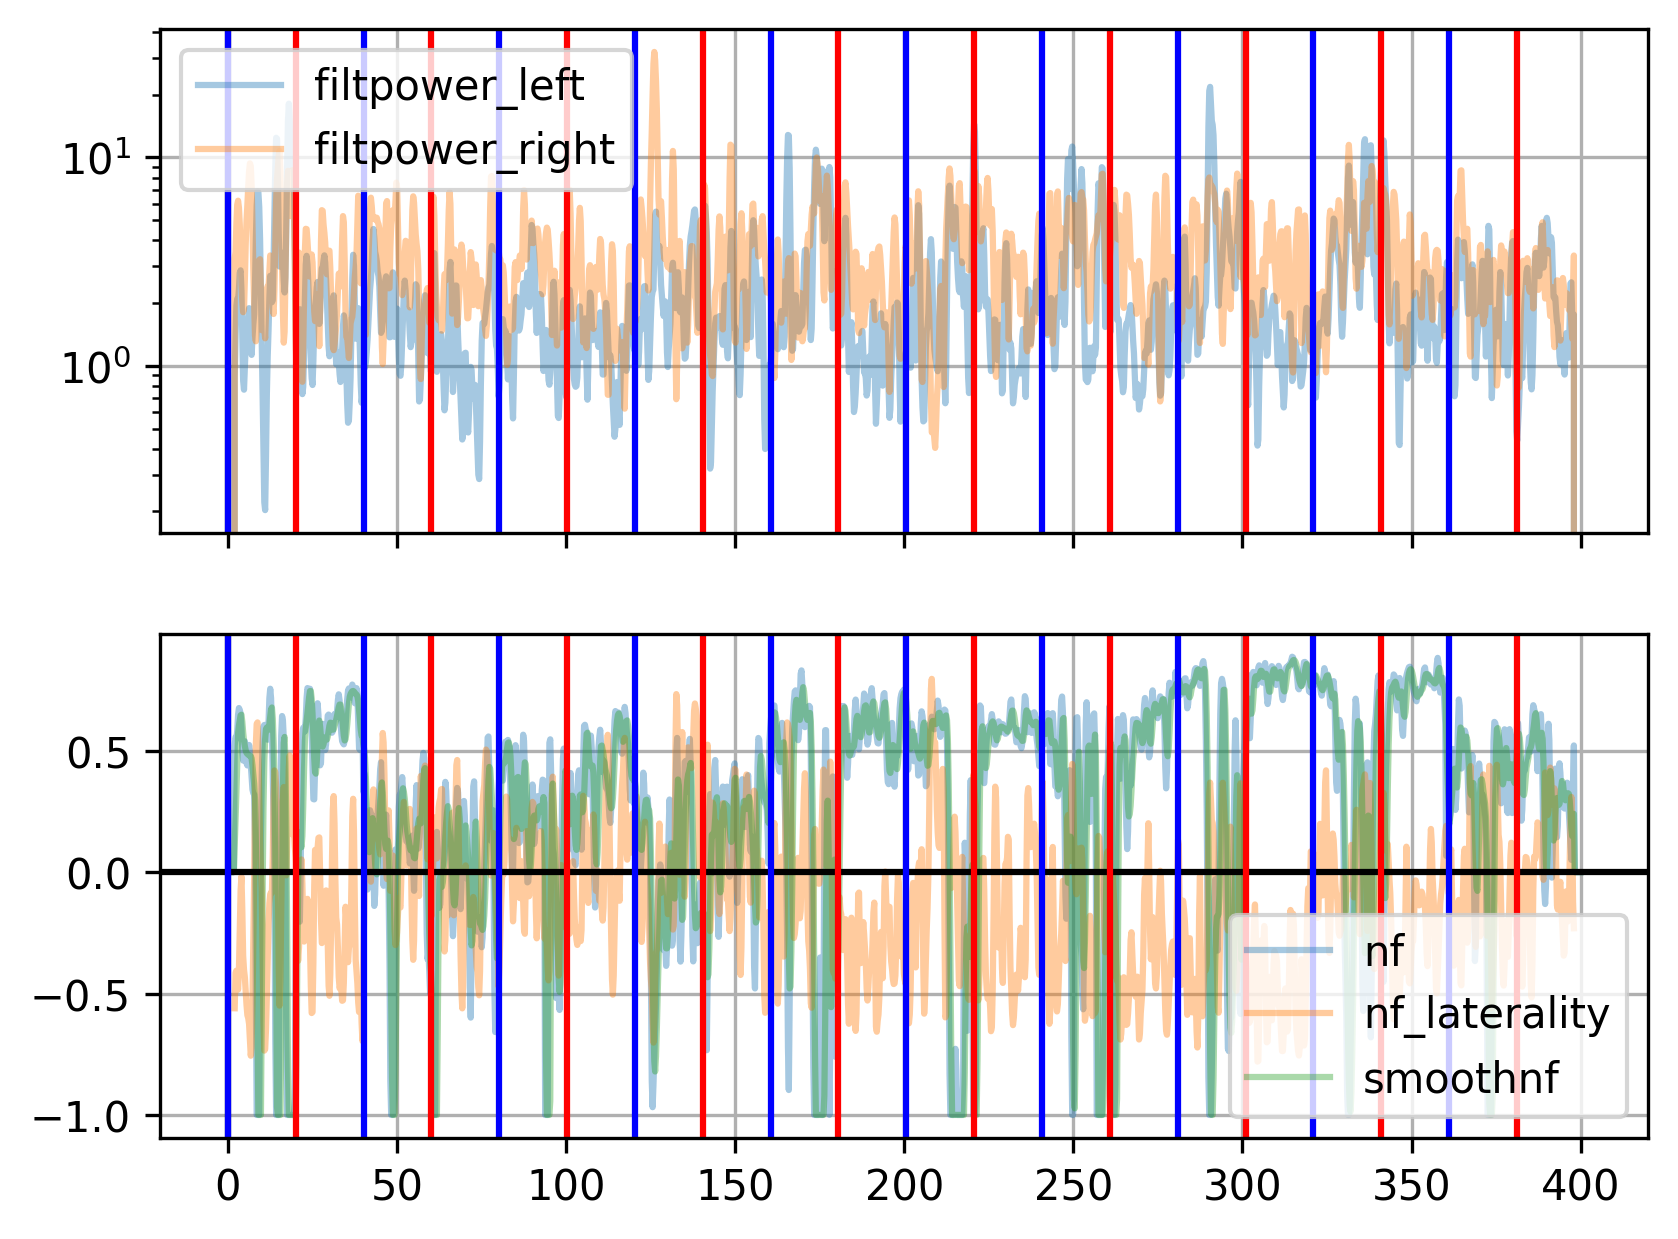

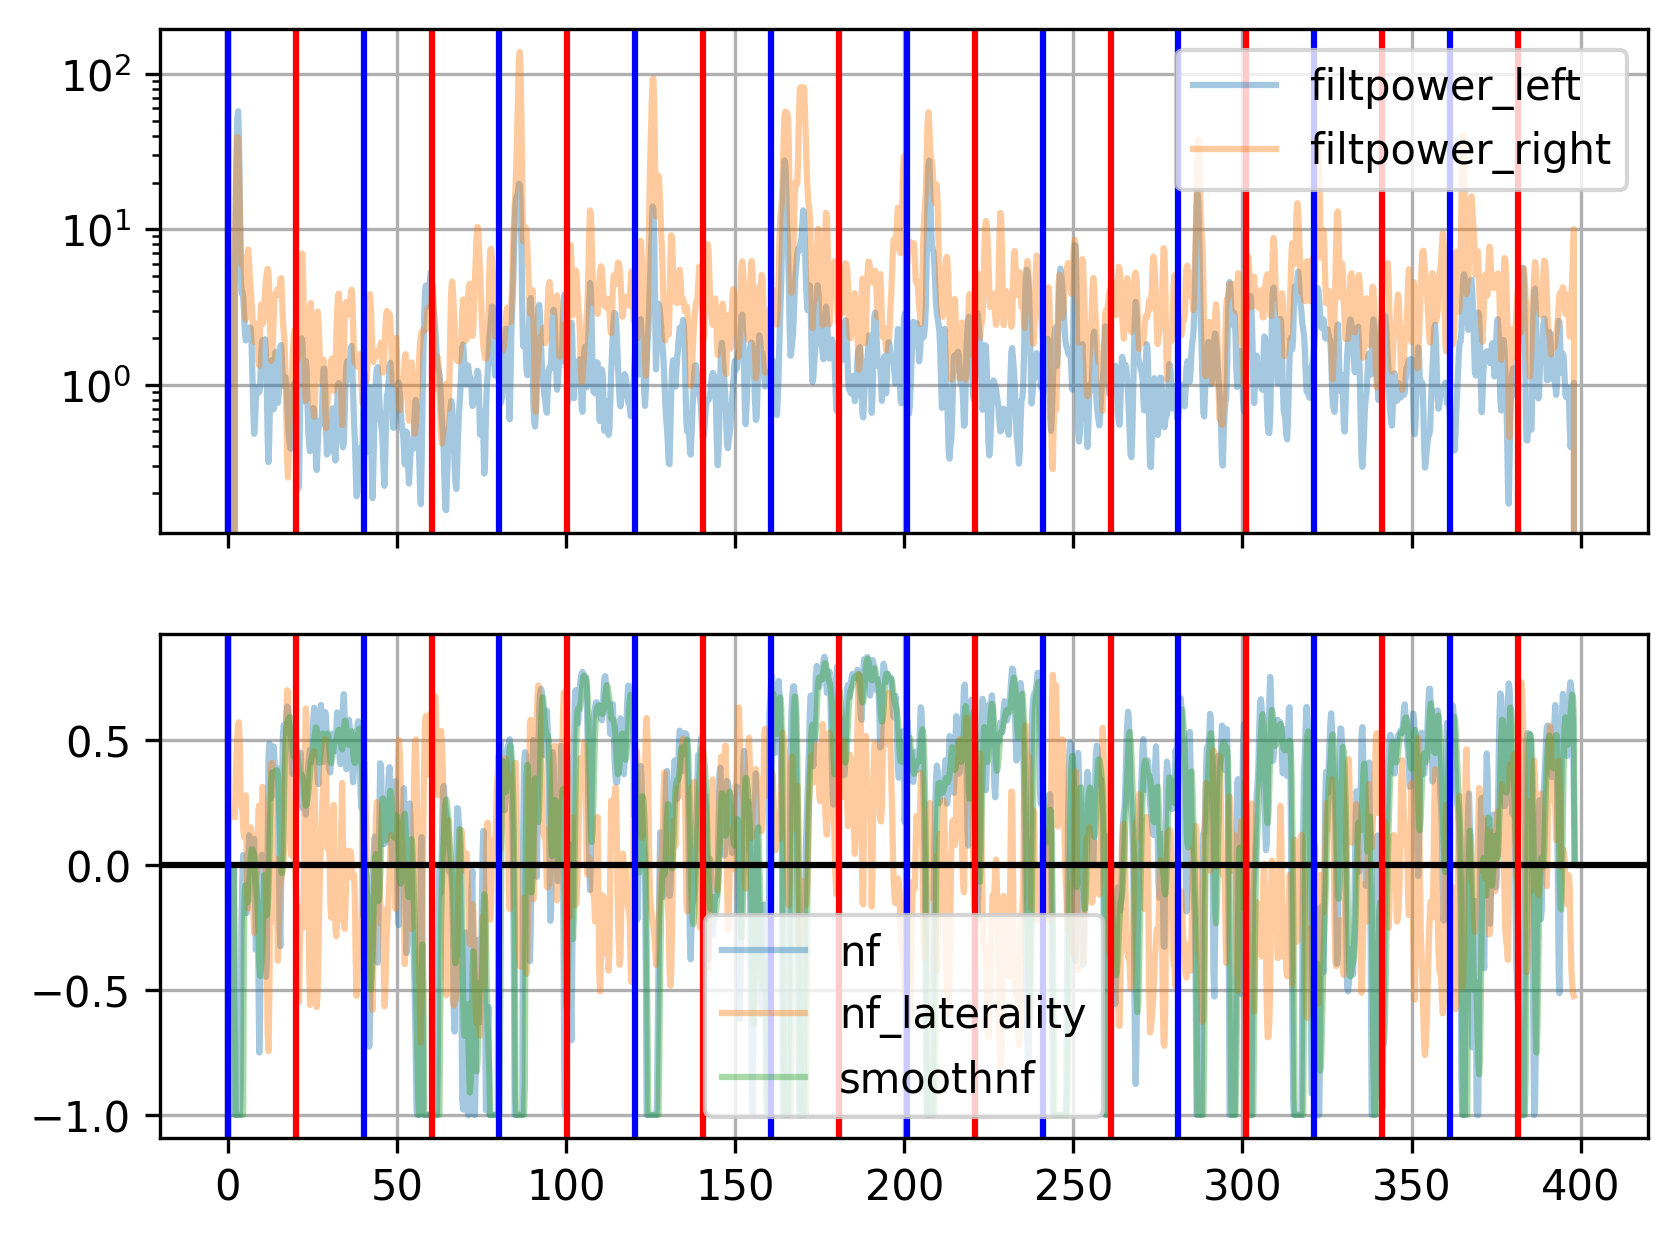

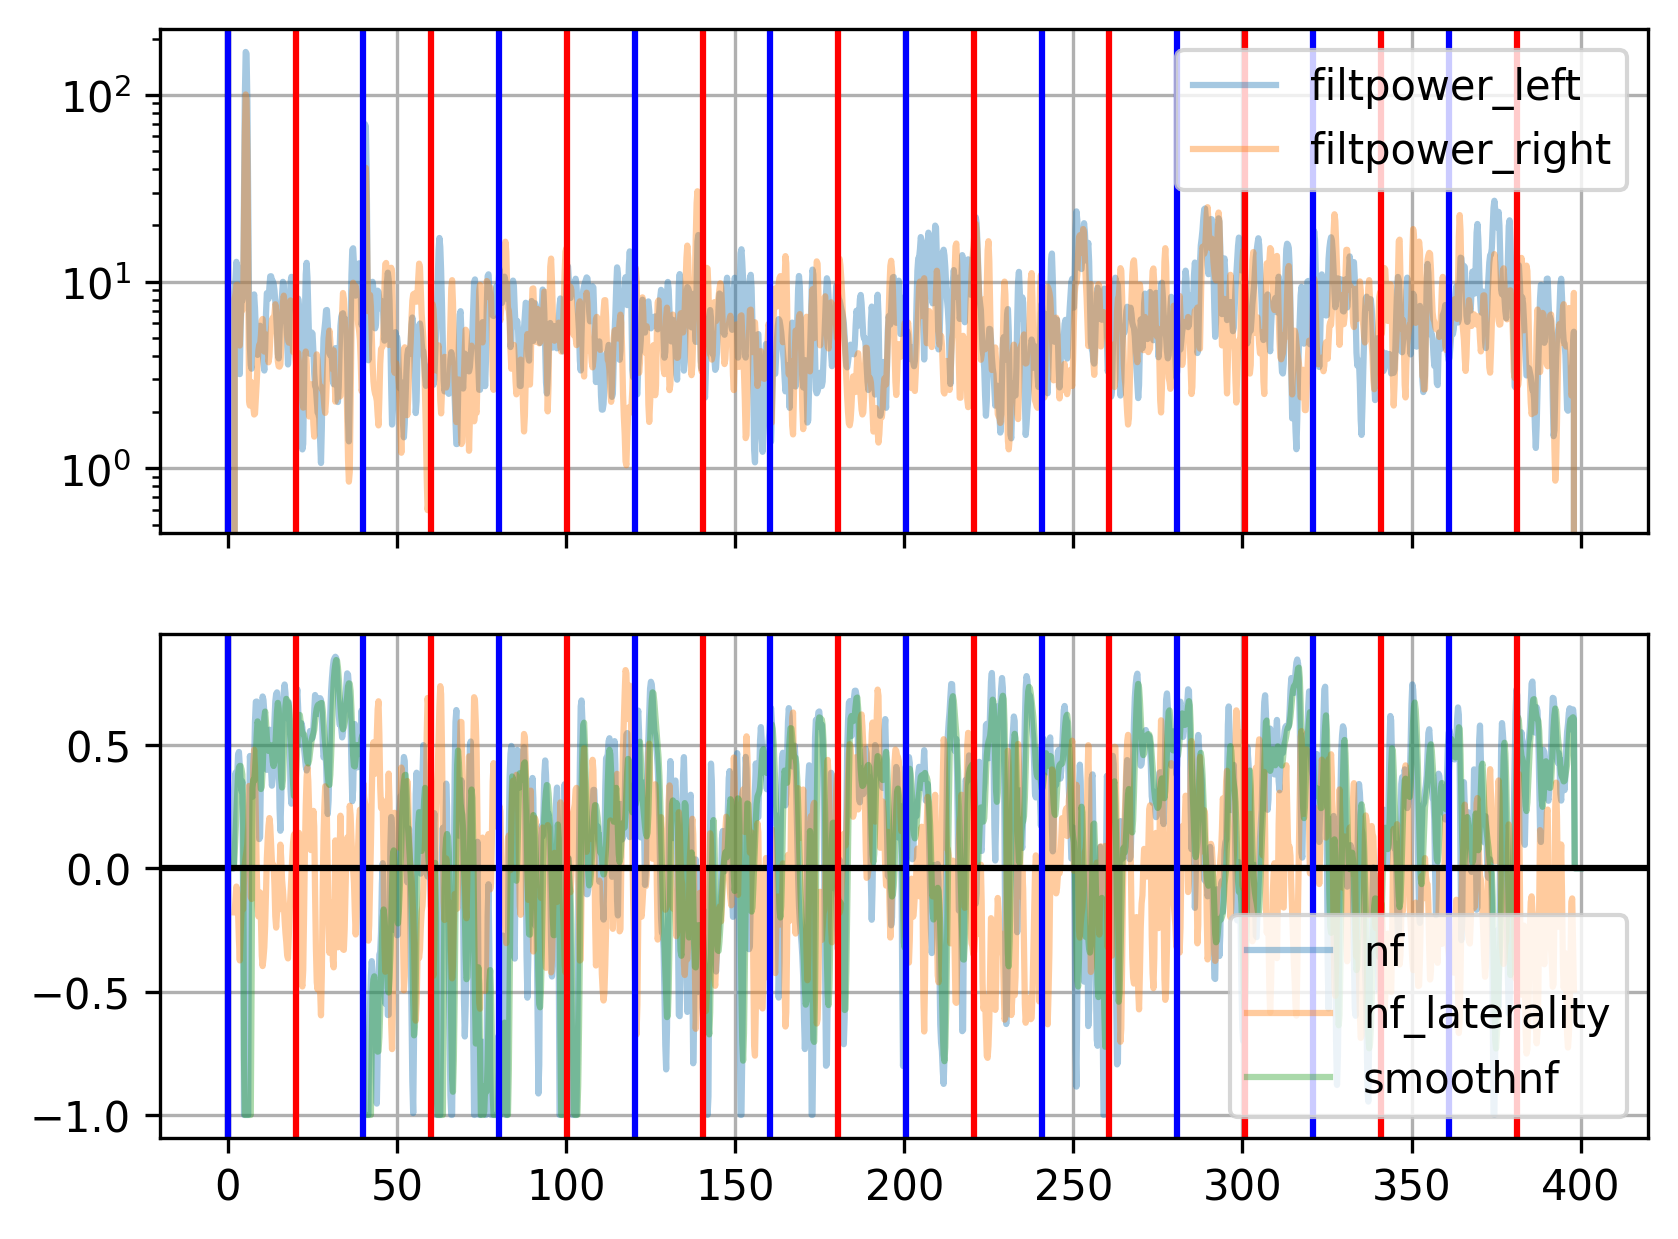

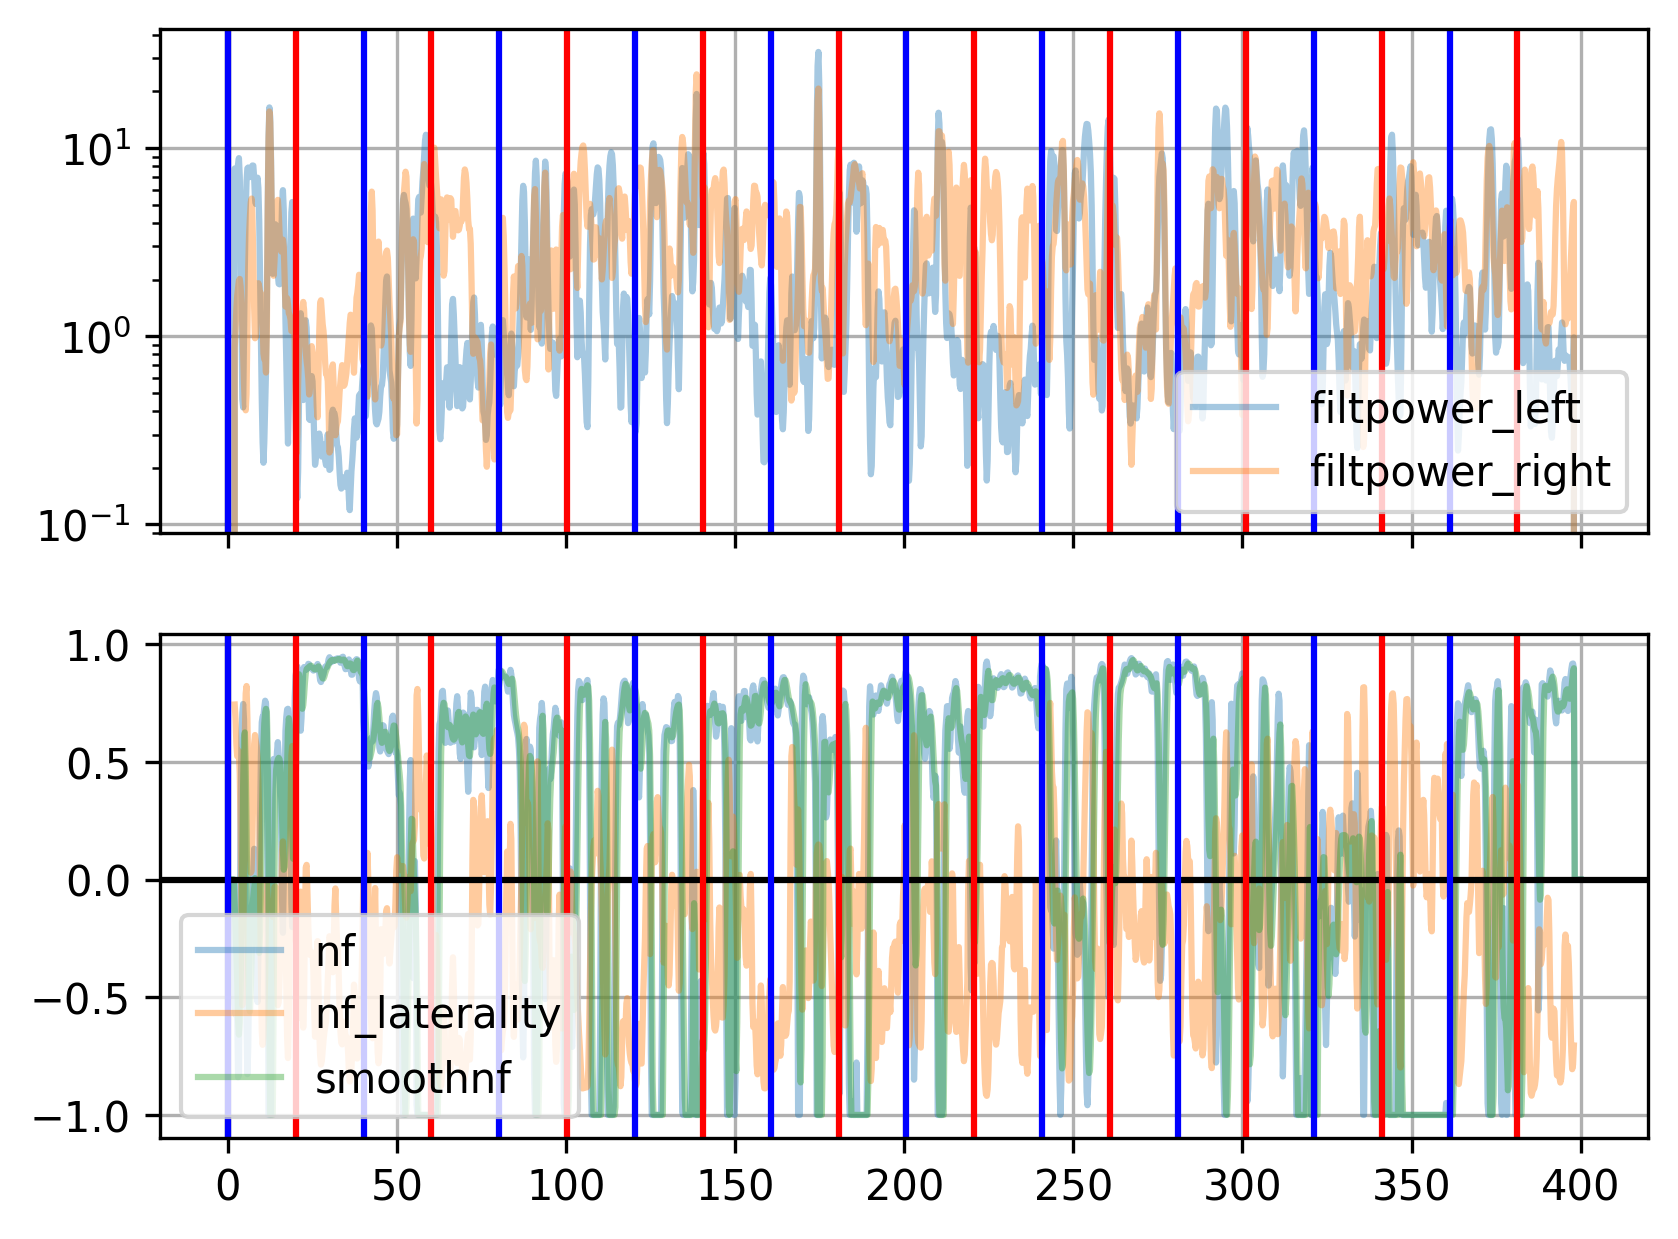

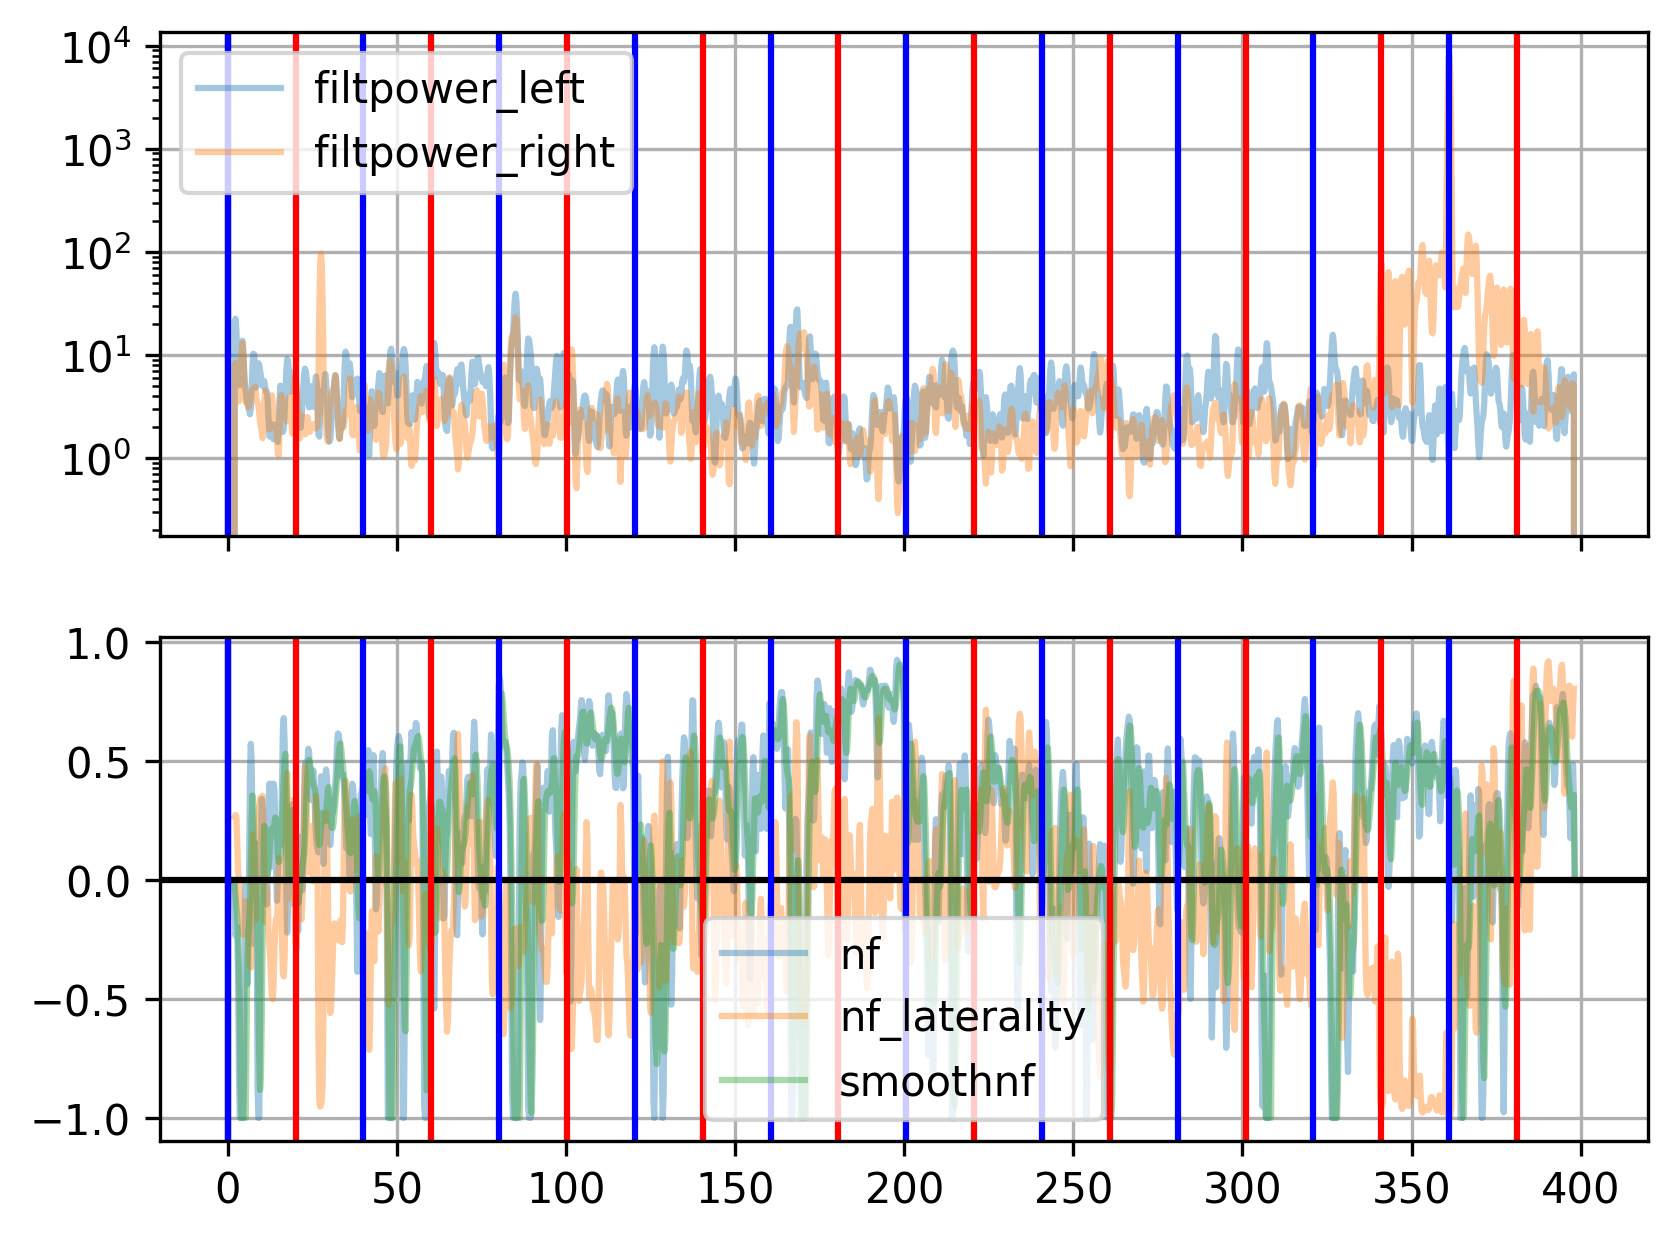

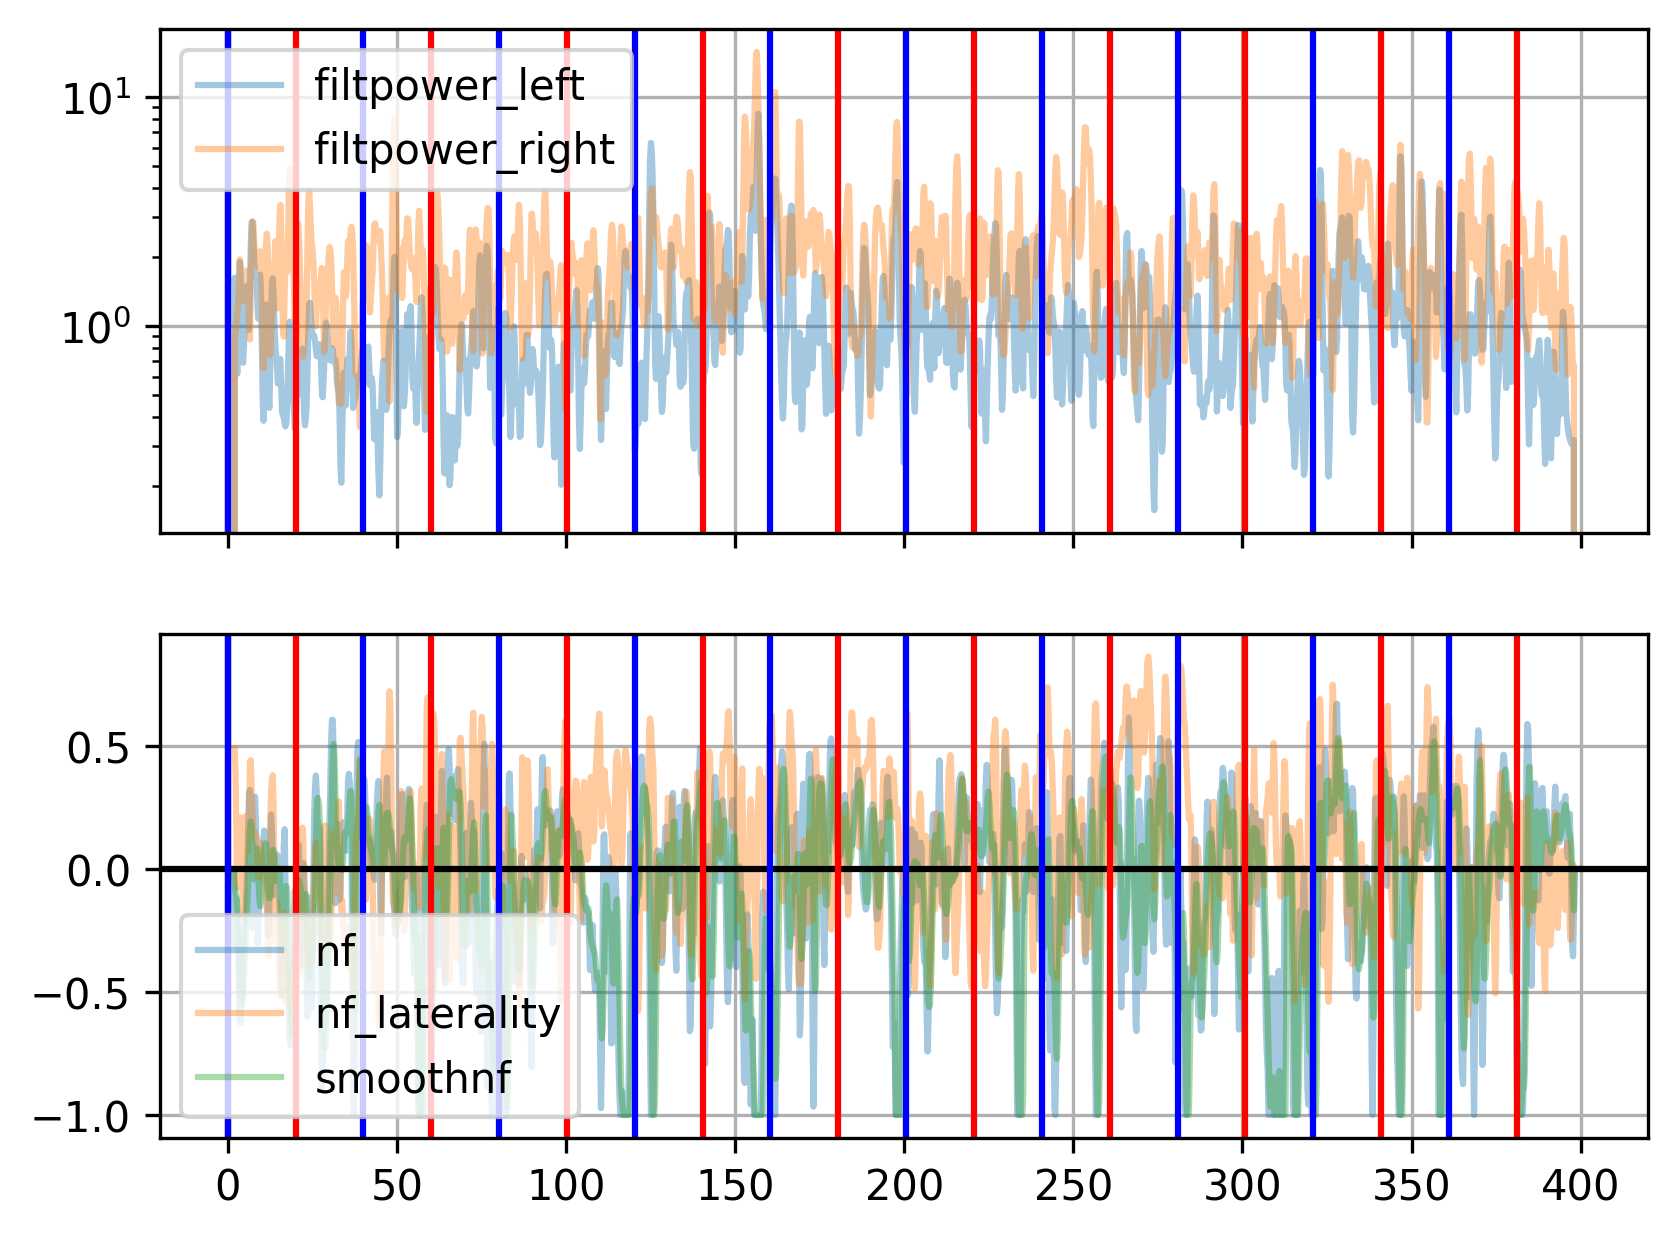

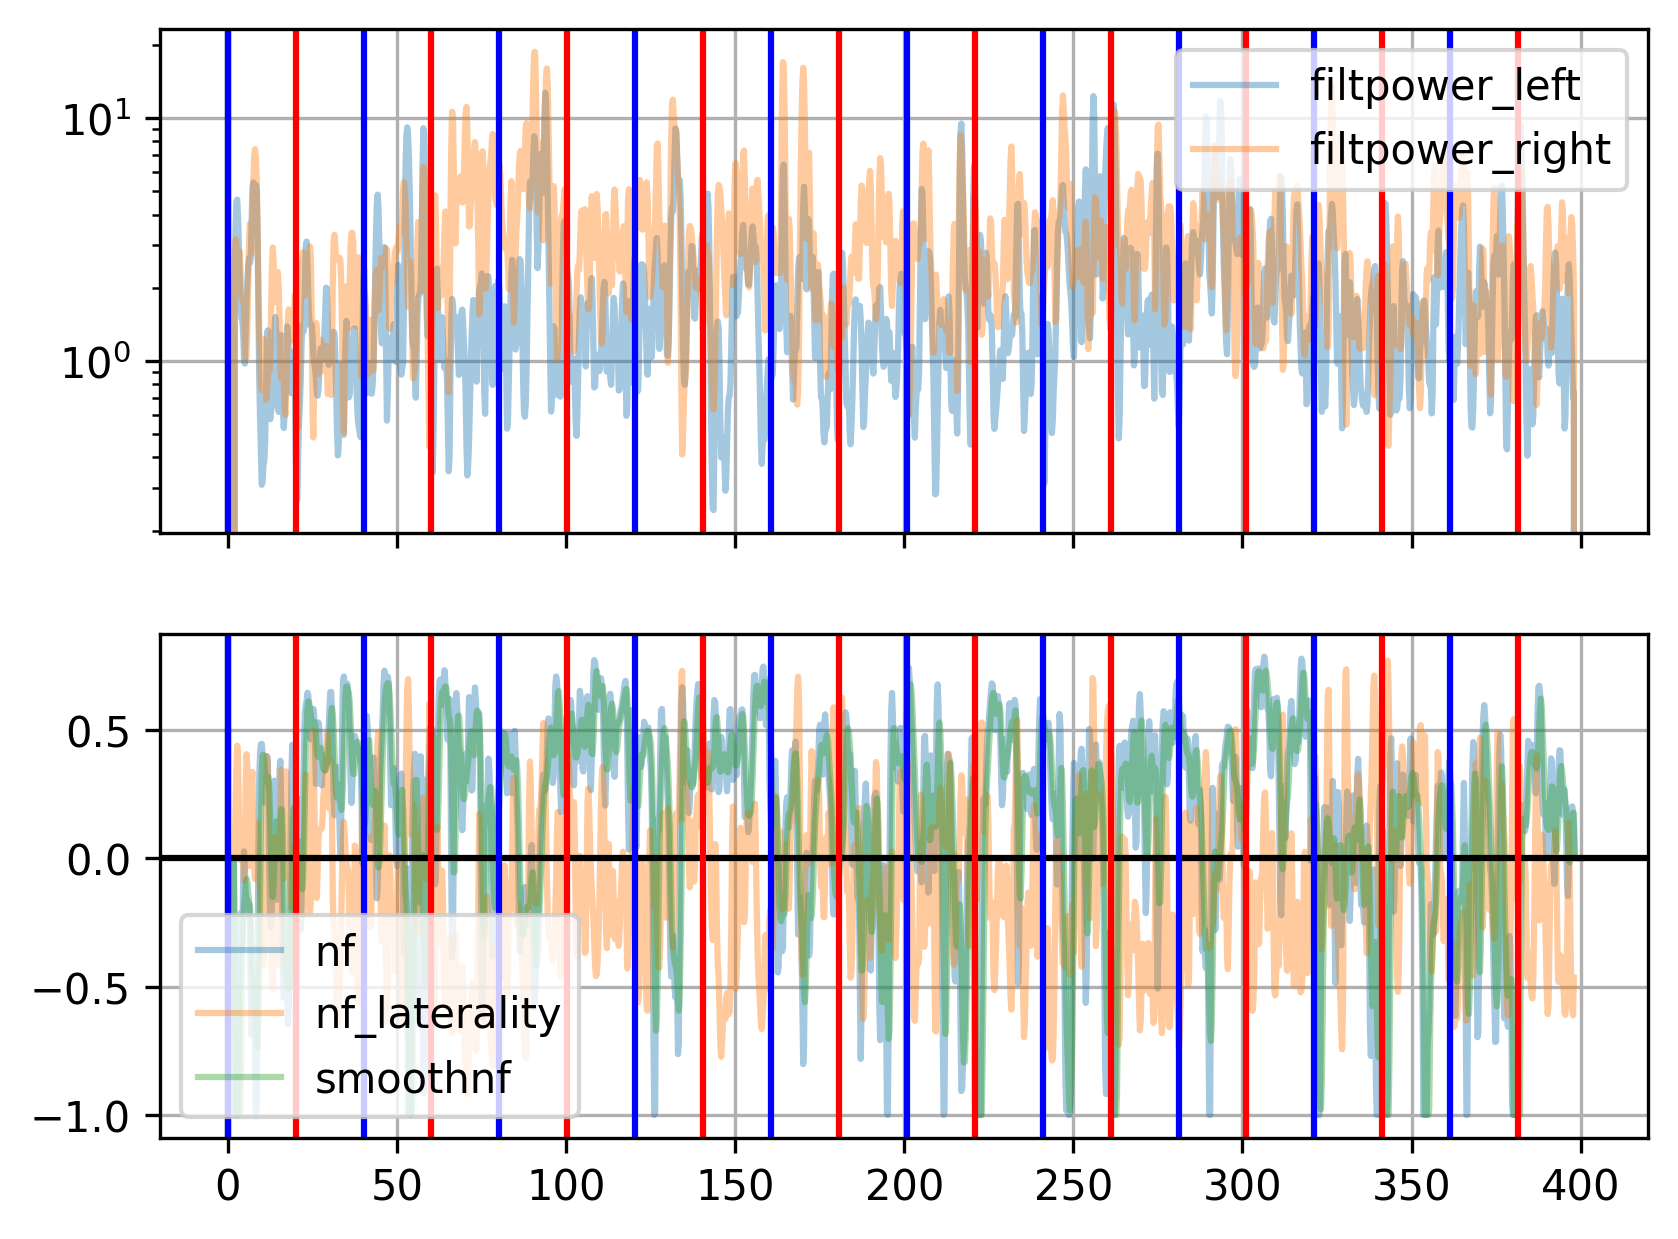

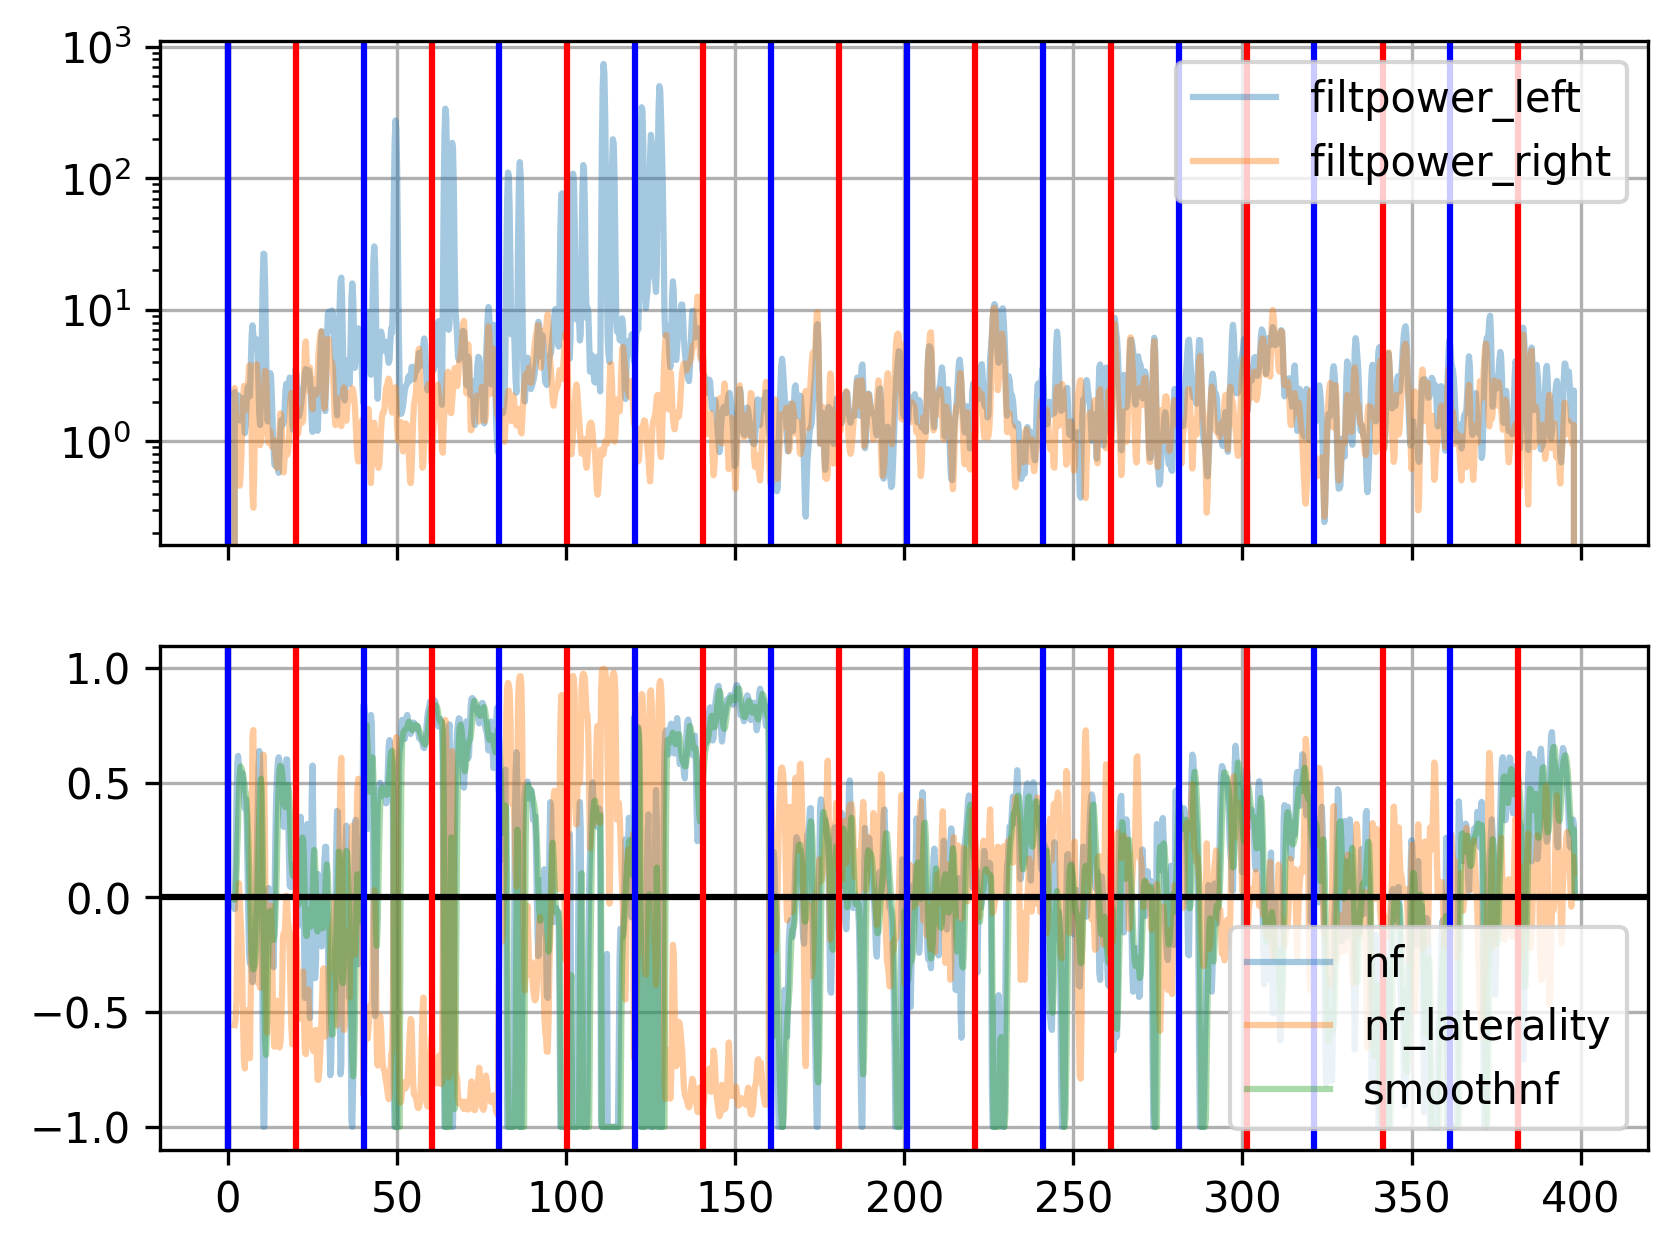

In [4]:
def return_mat_data(mat_path):
    mat_f = h5py.File(mat_path)
    
    preprocessed_eeg = mat_f["NF_eeg"]["eegdata"][:]
    fig,axes = plt.subplots(2,1,sharex=True)

    # Brain activity
    open_this = ["filtpower_left","filtpower_right"]
    xs = np.arange(1,1600+1,1)
    # for saved_val in open_this:
    #     val = mat_f["NF_eeg"][saved_val][800:]
    #     axes[0].plot(xs,val[:,0],label=saved_val,alpha=0.4)

    rh = np.log(mat_f["NF_eeg"]["filtpower_left"][:]+1.01)
    lh = np.log(mat_f["NF_eeg"]["filtpower_right"][:]+1.01)

    rh = mat_f["NF_eeg"]["filtpower_left"][:]
    lh = mat_f["NF_eeg"]["filtpower_right"][:]
    
    
    later_arr = (rh-lh)/(rh+lh)
    saved_later = mat_f["NF_eeg"]["nf_laterality"][:]
    diff = later_arr - saved_later

    axes[0].plot(rh-lh)
    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    # axes[1].plot(xs,later_arr,label="computed",alpha=1.0,color="red")    
    # axes[1].plot(xs,saved_later,label="saved",alpha=0.4)
    axes[1].plot(xs,diff,label="saved",alpha=0.4)


    # Feedback
    open_this = ["nf","nf_laterality","smoothnf"]
    # for saved_val in open_this:
    #     val = np.clip(mat_f["NF_eeg"][saved_val][:],-1,1)
    #     axes[1].plot(xs,val[:,0],label=saved_val,alpha=0.4)
    axes[1].legend()
    axes[1].grid()

    for ax in axes:
        ax.axhline(y=0, color='k')
        ax.axvline(x=0, color='k')

    fig.show()
    # Opening method :
    # print( mat_f["NF_eeg"]["method"].keys())
    # print(mat_f["NF_eeg"]["method"]["freq_band_nf"][:])
    # print(mat_f["NF_eeg"]["method"]["freq_band_nf_laterality"][:])
    # print(mat_f["NF_eeg"]["method"]["lapC3_filter"][:].shape)

data_path = os.path.join("..","..","data","xp1")
derivs_path = os.path.join(data_path,"derivatives")
subj_names = os.listdir(derivs_path)
subject_paths = [os.path.join(derivs_path,subj_name) for subj_name in subj_names]
        

fsample = 200.0 # Hz
def compute_ms_time(t,_fsample):
    return (t - 1.0) * (1/_fsample)*1e3


for subj_path,subj_name in zip(subject_paths,subj_names):
    fig,axes = plt.subplots(2,1,sharex=True,dpi=300)


    vmrk = os.path.join(subj_path,"eeg_pp",subj_name+"_task-eegNF_eeg_pp.vmrk")
    data = pd.read_csv(vmrk, header=None, skiprows=4, delimiter='\t')

    dataname = "d_" + subj_name + "_task-eegNF_NFeeg_scores.mat"
    mat_path = os.path.join(subj_path,"NF_eeg",dataname)
    mat_f = h5py.File(mat_path)

    # Brain activity
    open_this = ["filtpower_left","filtpower_right"]
    xs = np.linspace(0,400,1600)  # 10 x (20 + 20 secs)
    for saved_val in open_this:
        val = mat_f["NF_eeg"][saved_val][:]
        axes[0].plot(xs,val[:,0],label=saved_val,alpha=0.4)

    lm_electrode_bp = mat_f["NF_eeg"]["filtpower_left"][:]
    rm_electrode_bp = mat_f["NF_eeg"]["filtpower_right"][:]
    later_arr = (lm_electrode_bp-rm_electrode_bp)/(rm_electrode_bp+lm_electrode_bp+0.01)
    # saved_later = mat_f["NF_eeg"]["nf_laterality"][:]
    # diff = later_arr - saved_later

    axes[0].set_yscale("log")
    axes[0].legend()
    axes[0].grid()

    # Feedback
    open_this = ["nf","nf_laterality","smoothnf"]
    for saved_val in open_this:
        val = np.clip(mat_f["NF_eeg"][saved_val][:],-1,1)
        axes[1].plot(xs,val[:,0],label=saved_val,alpha=0.4)
    # axes[1].plot(xs,later_arr,color="red")
    axes[1].legend()
    axes[1].grid()

    for ax in axes:
        ax.axhline(y=0, color='k')
        ax.axvline(x=0, color='k')
        
    # Check the starting time : 
    for i, row in data.iterrows():
        for colname in data.columns:
            row_element = row[colname]
            if ("New Segment" in row_element):
                list_of_info = (row_element.split(","))
                time_start = int(list_of_info[-1])
    tmsec = (time_start - 1.0) * (1/fsample)*1e3
    print(tmsec/1000)
    for i, row in data.iterrows():
        for colname in data.columns:
            row_element = row[colname]
            if ("Stimulus" in row_element):
                list_of_info = (row_element.split(","))
                stimtype = (list_of_info[1])
                stimtime = int(list_of_info[2])
                
                stimtime_s = compute_ms_time(stimtime,fsample)/1000.0
                if (stimtype=="S 99"): # Beginning of a rest block
                    colormarker = "blue"
                if (stimtype=="S  2"): # Beginning of a task block
                    colormarker= "red"
                for ax in axes :
                    ax.axvline(x=stimtime_s,color=colormarker)


    fig.show()
